# Question 3 (difference equations)

- Find the general solution of the difference equation

$$
a_{n+1} = a_n + 2a_{n−1} − 2a_{n−2}.
$$

- Find the particular solution which satisfies the condition $a_0 = a_1 = 0$, $a_2 = 1$.

- Using this solution and Python, evaluate $a_3, \dots, a_{20}$. 

- Verify that the values agree with those obtained by repeated use of the difference equation, starting from the specified values of $a_0, a_1$, and $a_2$.



**Python hints**  
NumPy allows us to easily evaluate the solution at multiple values of $n$. In this case, we are interested in 20 integers starting from zero, so we start by creating a range of these values as follows: 

In [1]:
import numpy as np
n = np.arange(20) 

Raising `2**(1/2)` by the power of each value of `n` in the list:

In [2]:
(2**(1/2))**n

array([   1.        ,    1.41421356,    2.        ,    2.82842712,
          4.        ,    5.65685425,    8.        ,   11.3137085 ,
         16.        ,   22.627417  ,   32.        ,   45.254834  ,
         64.        ,   90.50966799,  128.        ,  181.01933598,
        256.        ,  362.03867197,  512.        ,  724.07734394])

Alternatively, from the difference equation and starting with `a = [0, 0, 1, ...]`, we can calculate the next value of `a` as follows:
```python
a[n] = a[n - 1] + 2*a[n - 2] - 2*a[n - 3]
```
All we need to do is put this line of code inside a for loop that interates over $n$ from 3 to 20. You should find that you get the same sequence either way. For very large $n$ though one of the methods is affected by small numerical rounding errors. Why?

## Solution

First, we import the required modules, `numpy` and `matplotlib` and use the magic command for inline plotting.

In [3]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Analytical solution

The general solution can be found by using the trial solution $a_n = \lambda^n$. Substituting this into the original linear difference equation we get:

$$
\lambda = 1, \quad \lambda = \pm \sqrt{2}
$$

Inserting the initial condition:

$$
a_n = -1 + \dfrac{\sqrt{2} + 1}{2 \sqrt{2}}\big( \sqrt{2} \big)^n + \dfrac{\sqrt{2} - 1}{2 \sqrt{2}} \big(-\sqrt{2} \big)^n
$$

We now compute $a_n$ at a number of points:

In [4]:
# Generate an array of N integers
N = np.arange(20)

# Calculate a_n for each n
sqrt2 = 2**(1/2) # to save typing on next line
a_analytic = -1 + ((sqrt2 + 1)/(2*sqrt2))*sqrt2**n + ((sqrt2 - 1)/(2*sqrt2))*(-sqrt2)**n

### Numerical solution

We now compute the solution directly from the difference equation.

In [5]:
# Create array to store solution
a = np.empty(len(N))

# Set starting values
a[0], a[1], a[2] = 0, 0, 1  # Alternatively, a[:3] = [0, 0, 1]

# Loop over n
for n in range(3, len(a)):
    a[n] = a[n - 1] + 2*a[n - 2] - 2*a[n - 3]

### Comparing results

The two results are plotted to compare.

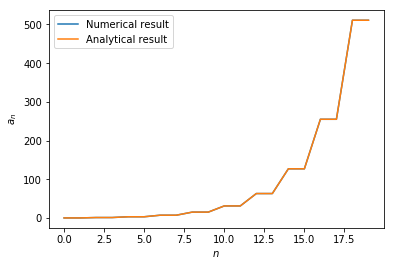

In [6]:
# Plot these graphs
plt.plot(N, a, label='Numerical result')
plt.plot(N, a_analytic, label='Analytical result')

# Add legend
plt.legend(loc=2)

# Label axes
plt.xlabel('$n$')
plt.ylabel('$a_n$');

Printing the results to the screen:

In [7]:
# Print out the results
for i in range(len(N)):
    print("n = %d, Analytic = %f, Numerical = %f" % (i, a_analytic[i], a[i]))

n = 0, Analytic = -0.000000, Numerical = 0.000000
n = 1, Analytic = -0.000000, Numerical = 0.000000
n = 2, Analytic = 1.000000, Numerical = 1.000000
n = 3, Analytic = 1.000000, Numerical = 1.000000
n = 4, Analytic = 3.000000, Numerical = 3.000000
n = 5, Analytic = 3.000000, Numerical = 3.000000
n = 6, Analytic = 7.000000, Numerical = 7.000000
n = 7, Analytic = 7.000000, Numerical = 7.000000
n = 8, Analytic = 15.000000, Numerical = 15.000000
n = 9, Analytic = 15.000000, Numerical = 15.000000
n = 10, Analytic = 31.000000, Numerical = 31.000000
n = 11, Analytic = 31.000000, Numerical = 31.000000
n = 12, Analytic = 63.000000, Numerical = 63.000000
n = 13, Analytic = 63.000000, Numerical = 63.000000
n = 14, Analytic = 127.000000, Numerical = 127.000000
n = 15, Analytic = 127.000000, Numerical = 127.000000
n = 16, Analytic = 255.000000, Numerical = 255.000000
n = 17, Analytic = 255.000000, Numerical = 255.000000
n = 18, Analytic = 511.000000, Numerical = 511.000000
n = 19, Analytic = 511.000

This shows that the results are the same.